In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1) Implement model as a stochastic simulator using the Euler-Maruyama method

In [11]:
def feedforward_inhibition(a: float, v: list[float], x0: np.ndarray, tau: int, alpha: float, dt: float, scale: float):
    """Simulates a single trial of feedforward inhibition

    Args:
        a (float): decision threshold
        v (list[float]): drift rate vi for each alternative
        x0 (np.ndarray): starting point for each accumulator
        tau (int): additive non-decision time
        alpha (float): strength of feedforward inhibition
        dt (float): small time increment
        scale (float): scale coefficient (usually 1)

    Returns:
        (float, int): (response time, winning decision)
    """
    assert len(x0) == len(v)
    
    J = x0.shape[0]
    decision = None
    rt = tau
    accumulators = x0.copy()
    const = scale * np.sqrt(dt)
    while decision == None:
        # Inhibition step
        inhibitors = np.zeros(J)
        for i in range(len(accumulators)):
            inhibitors[i] = (alpha / (J - 1.0)) * sum(drift if j != i else 0 for j, drift in enumerate(v))
        # Gaussian update
        for i in range(len(accumulators)):
            step = ((v[i] - inhibitors[i]) * dt) + (scale * const * np.random.normal(loc=0.0, scale=scale))
            accumulators[i] = max(accumulators[i] + step, 0)
        # Update time step
        rt += dt
        # Check for decision
        for i in range(len(accumulators)):
            if accumulators[i] >= a:
                decision = i
                break
    return (rt, decision)

In [12]:
# Test run for J = 3
a = 0.8
v = [0.2, 0.5, 0.6]
x0 = np.zeros(3)
tau = 0.4
alpha = 0.8
dt = 1e-3
scale = 1.0
feedforward_inhibition(a, v, x0, tau, alpha, dt, scale)

(0.6980000000000003, 2)

In [13]:
# Run multiple simulations
def simulate_multiple(num_trials, a, v, x0, tau, alpha, dt, scale):
    data = np.zeros((num_trials,2))
    for i in range(num_trials):
        data[i,:] = feedforward_inhibition(a, v, x0, tau, alpha, dt, scale)
    return data

In [14]:
# Visualize decisions and response times for J options
def visualize_model(data, J):
    f, ax = plt.subplots(1,1,figsize=(5,5))
    for i in range(J):
        sns.histplot(data[:,0][data[:,1] == i], alpha=0.7, ax=ax, label=f"Option {i+1}")
    sns.despine(ax=ax)
    ax.set(xlabel="Response time(s)", ylabel="")
    ax.set_yticks([])
    ax.legend()
    return f

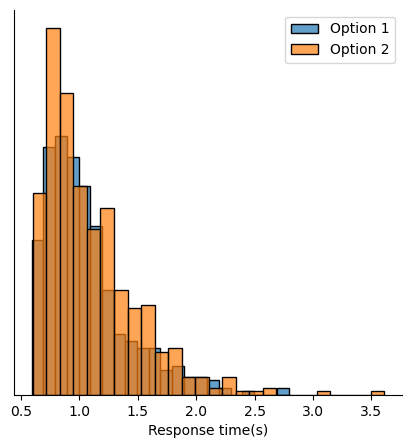

In [15]:
# Verify reasonable looking response times for J = 2
num_trials = 1000
a = 1.0
v = [1.0, 1.0]
x0 = np.zeros(2)
tau = 0.5
alpha = 0.8
dt = 1e-3
scale = 1.0

data = simulate_multiple(num_trials, a, v, x0, tau, alpha, dt, scale)
f = visualize_model(data, 2)
f.savefig("feedforward_2.png", dpi=300)

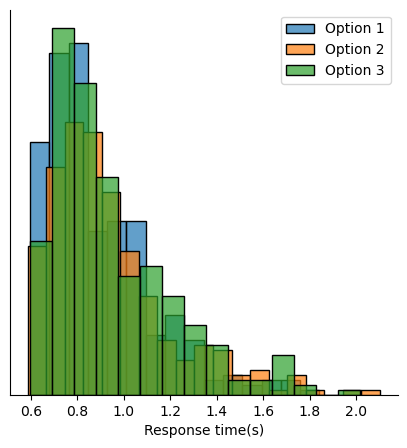

In [16]:
# Verify reasonable looking response times for J = 3
num_trials = 1000
v = [1.0, 1.0, 1.0]
x0 = np.zeros(3)

data = simulate_multiple(num_trials, a, v, x0, tau, alpha, dt, scale)
f = visualize_model(data, 3)
f.savefig("feedforward_3.png", dpi=300)

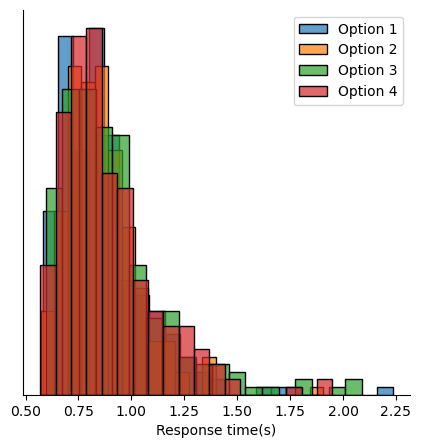

In [17]:
# Verify reasonable looking response times for J = 4
num_trials = 1000
v = [1.0, 1.0, 1.0, 1.0]
x0 = np.zeros(4)

data = simulate_multiple(num_trials, a, v, x0, tau, alpha, dt, scale)
f = visualize_model(data, 4)
f.savefig("feedforward_4.png", dpi=300)

### 2) Visualize single trial

In [18]:
def feedforward_inhibition_history(a: float, v: list[float], x0: list[float], tau: int, alpha: float, dt: float, scale: float):
    """Simulates a single trial of feedforward inhibition

    Args:
        a (float): decision threshold
        v (list[float]): drift rate vi for each alternative
        x0 (np.ndarray): starting point for each accumulator
        tau (int): additive non-decision time
        alpha (float): strength of feedforward inhibition
        dt (float): small time increment
        scale (float): scale coefficient (usually 1)

    Returns:
        list[list[float]]: accumulators and their values over time
    """
    assert len(x0) == len(v)
    
    J = len(x0)
    decision = None
    rt = tau
    accumulators = [[x] for x in x0]
    const = scale * np.sqrt(dt)
    while decision == None:
        # Inhibition step
        inhibitors = np.zeros(J)
        for i in range(len(accumulators)):
            inhibitors[i] = (alpha / (J - 1.0)) * sum(drift if j != i else 0 for j, drift in enumerate(v))
        # Gaussian update
        for i in range(len(accumulators)):
            step = ((v[i] - inhibitors[i]) * dt) + (scale * const * np.random.normal(loc=0.0, scale=scale))
            accumulators[i].append(max(accumulators[i][-1] + step, 0))
        # Update time step
        rt += dt
        # Check for decision
        for i in range(len(accumulators)):
            if accumulators[i][-1] >= a:
                decision = i
                break
    return accumulators

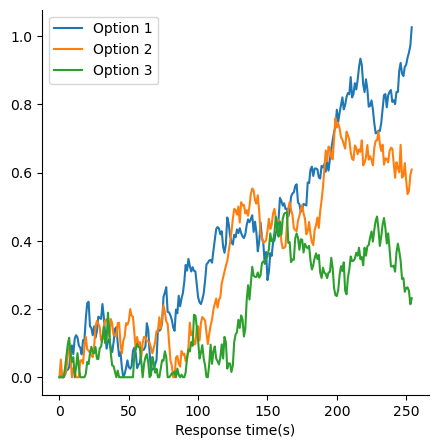

In [19]:
# Plot simulation
def plot_feedforward_history(data):
    """Plots history for each accumulator

    Args:
        data (list[list[float]]): list of accumulators and their history
    """
    f, ax = plt.subplots(1,1,figsize=(5,5))
    for i in range(len(data)):
        ax.plot(data[i], label=f"Option {i+1}")
    sns.despine(ax=ax)
    ax.legend()
    ax.set(xlabel="Response time(s)", ylabel="")
    return f

a = 1.0
v = [1.0, 1.0, 1.0]
x0 = [0.0, 0.0, 0.0]
tau = 0.5
alpha = 0.8
dt = 1e-3
scale = 1.0

data = feedforward_inhibition_history(a, v, x0, tau, alpha, dt, scale)
f = plot_feedforward_history(data)
f.savefig("feedforward_hist.png", dpi=300)

### 3) Explore the effects of alpha on the simulated RTs in a Feedforward Inhibition model

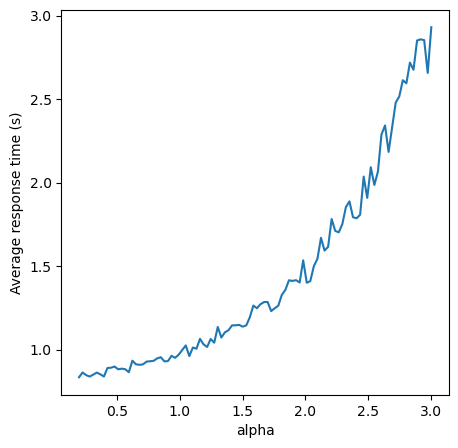

In [20]:
# Test alpha's influence
# This takes around 3 minutes to run dependent on your machine
num_trials = 200
a = 1.0
v = [1.0, 1.0, 1.0]
x0 = np.zeros(3)
tau = 0.5
alpha = 1.0
dt = 1e-3
scale = 1.0

alphas = np.linspace(0.2, 3.0, 100)
y = [np.average(simulate_multiple(num_trials, a, v, x0, tau, alpha_test, dt, scale)[:,0]) for alpha_test in alphas]
f, ax = plt.subplots(1,1,figsize=(5,5))
ax.plot(alphas, y)
ax.set(xlabel="alpha", ylabel="Average response time (s)")
f.savefig("feedforward_alphas.png", dpi=300)

Based on the above graph, the average response time increases polynomially or exponentially with alpha

### 4) Numba Efficiency
Due to the data being a time series (each iteration being dependent on the previous) we may be unable to utilize just in time compilation and vectorize the model.